# About Project

* Project Title - Customer Churn Prediction 
* Description - The Airtel customers converted into Jio how much percentage 
* Input/Output - The customers converted and the output will be the 70% of is converted
* Use case -  More problems faced customres the convert to anthoner services

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  Load the data

In [3]:
df=pd.read_csv(r"C:\Users\NaveenNani\Downloads\churn_dataset (1).csv")
df.drop(df.filter(regex="Unnamed"),axis=1, inplace=True)

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

In [9]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [12]:
num=df.select_dtypes(include='number')
cat=df.select_dtypes(exclude='number')

## Exploratory Data Analysis

## Univariate analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

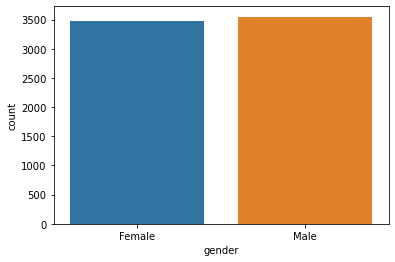

In [13]:
sns.countplot(data = df,x = 'gender')

In [14]:
## From the above plot the male ratio is high in count

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

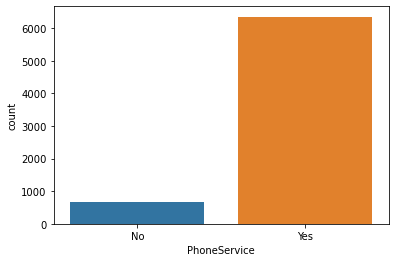

In [15]:
sns.countplot(data = df,x = 'PhoneService')

In [16]:
## From the above plot the Phone service is there for many of the people

<AxesSubplot:xlabel='Churn', ylabel='count'>

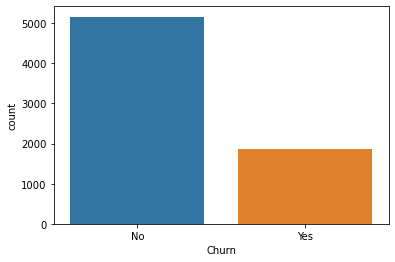

In [17]:
sns.countplot(data = df,x = 'Churn')

C:\Users\NaveenNani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure'>

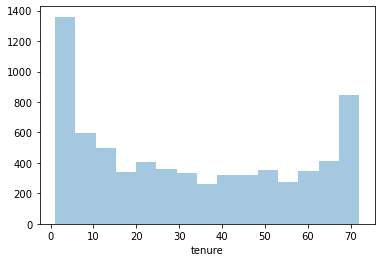

In [18]:
sns.distplot( a=df["tenure"], hist=True, kde=False, rug=False )

## Bi variate analysis

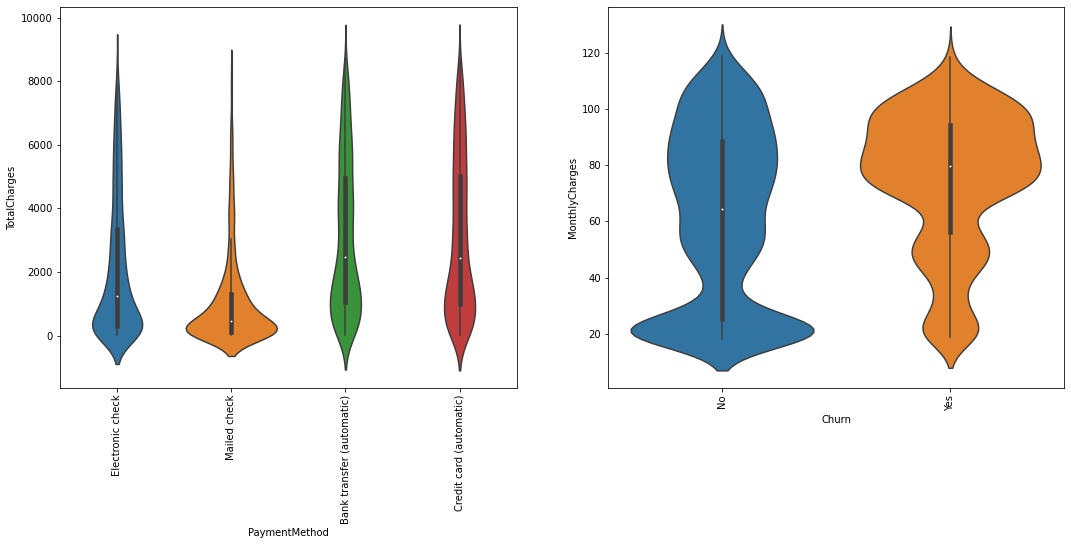

In [19]:
fig,axes=plt.subplots(1,2,figsize=(18,7))
sns.violinplot(x=df['PaymentMethod'],y=df['TotalCharges'],data=df,ax=axes[0])
sns.violinplot(x=df['Churn'],y=df['MonthlyCharges'],data=df)
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()


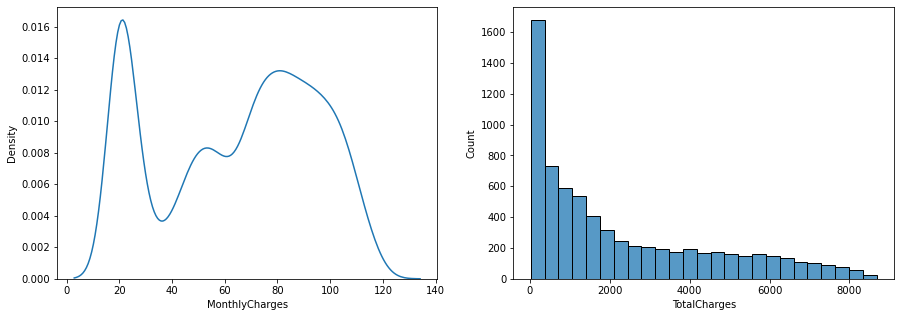

In [20]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(x=df['MonthlyCharges'],data=df,ax=axes[0])
sns.histplot(x=df['TotalCharges'],data=df,ax=axes[1])
plt.show()

## Observation:
--> The Monthly charges have most density in the range 40-120
--> The Total charges of maximum count lies between 0-2000


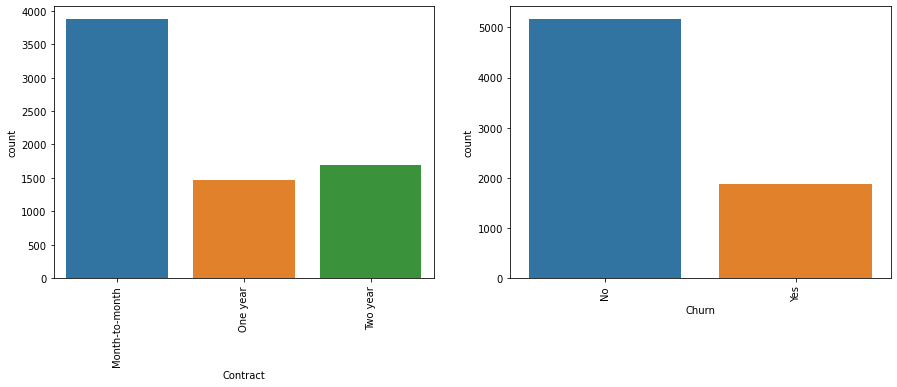

In [21]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df['Contract'],data=df,ax=axes[0])
plt.sca(axes[0])
plt.xticks(rotation=90)
sns.countplot(x=df['Churn'],data=df,ax=axes[1])
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()


## Observation:
--> The month-to-Month contract count is more compare to one year and two year.
--> In Churn No is having maximum count comparing to yes.


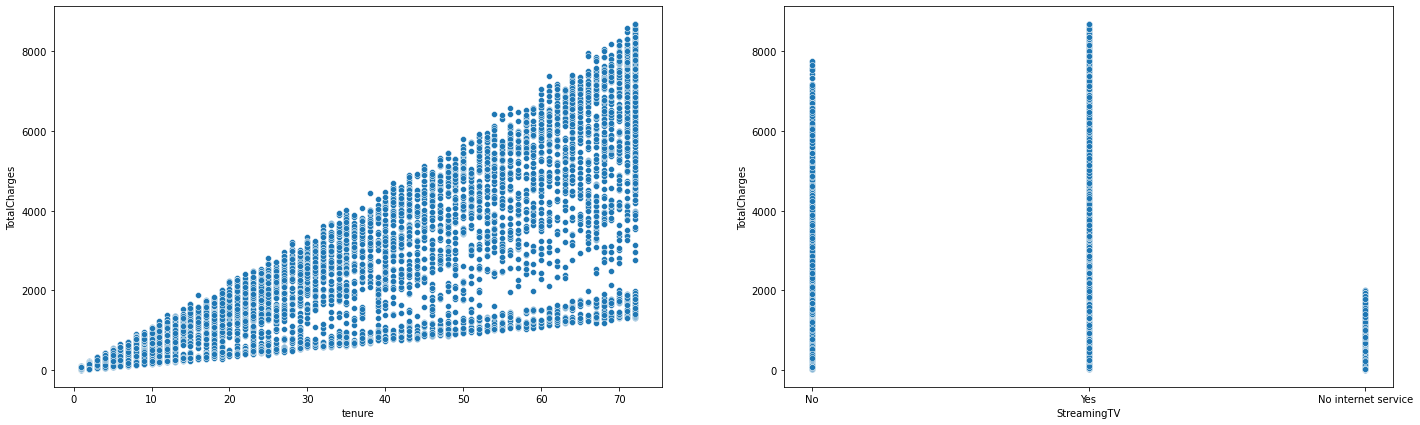

In [22]:
fig,axes=plt.subplots(1,2,figsize=(24,7))
sns.scatterplot(x=df['tenure'],y=df['TotalCharges'],data=df,ax=axes[0])
sns.scatterplot(x=df['StreamingTV'],y=df['TotalCharges'],data=df,ax=axes[1])
plt.show()

## Observation:
If the tenure increases the total charges are also incresed.
In streaming Tv No internet service Total charges around 2000.


## Multivariate 

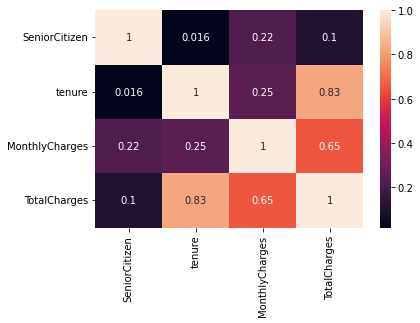

In [23]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## Observation
--> Tenure and Total charges has mostly positive correlation in otherend SeniorCitizen and tenure has very low positive correlation.


In [24]:
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

C:\Users\NaveenNani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


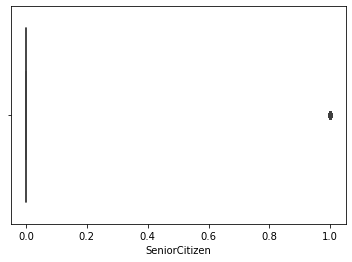

C:\Users\NaveenNani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


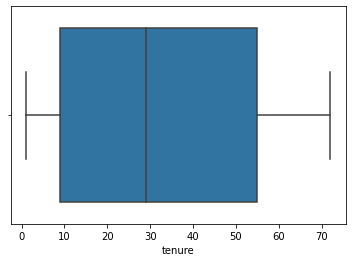

C:\Users\NaveenNani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


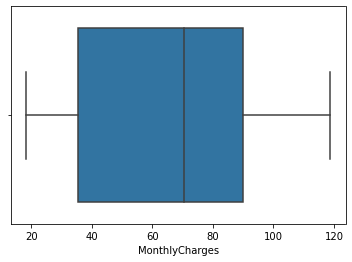

C:\Users\NaveenNani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


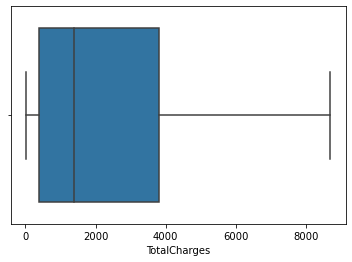

In [26]:
for i in num:
 sns.boxplot(df[i])
 plt.show()

In [27]:
df.drop('customerID',axis=1,inplace=True)

In [28]:
df.duplicated().sum()

22

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [31]:
import os
os.getcwd()
df.to_csv(r"C:\Users\NaveenNani\Downloads\churn_dataset.csv")

In [32]:
churn=pd.read_csv(r"C:\Users\NaveenNani\Downloads\churn_dataset.csv")
churn.drop(churn.filter(regex="Unnamed"),axis=1, inplace=True)
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7006,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7007,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7008,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [33]:
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 


In [35]:
X=churn[[ 'gender', 'Partner', 'Dependents',
 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
y=churn['Churn']

## Split the dataset into Training and Testing

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5257, 18) (5257,)
(1753, 18) (1753,)


In [37]:
churn['PaymentMethod'].value_counts()


Electronic check             2359
Mailed check                 1588
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [38]:
X_train_num=X_train.select_dtypes(include=['int64','float64'])
X_train_cat=X_train.select_dtypes(include='object')

## Data preparation on train data:

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_trans = pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns, index = X_train_num.index)
X_train_num_trans.head()

,tenure,MonthlyCharges,TotalCharges
5882,-1.278333,0.669911,-0.969428
4371,-0.094301,1.182861,0.293170
1978,1.048902,1.464318,1.777069
3182,0.436472,-0.311024,0.030111
3661,-1.278333,-1.478487,-0.997990


In [40]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse=False)
X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat),
                               columns=encoder.get_feature_names(X_train_cat.columns),
                               index = X_train_cat.index)

X_train_cat_ohe.head()

C:\Users\NaveenNani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5882,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4371,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1978,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3182,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3661,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## concat train data

In [41]:
X_train_transformed = pd.concat([X_train_num_trans,X_train_cat_ohe],axis =1)
X_train_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5882,-1.278333,0.669911,-0.969428,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4371,-0.094301,1.182861,0.293170,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1978,1.048902,1.464318,1.777069,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3182,0.436472,-0.311024,0.030111,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3661,-1.278333,-1.478487,-0.997990,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Data preparation on test data

In [42]:
X_test_num=X_test.select_dtypes(include=['int64','float64'])
X_test_cat=X_test.select_dtypes(include='object')

In [43]:
X_test_num_trans = pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index = X_test_num.index)
X_test_num_trans.head()

,tenure,MonthlyCharges,TotalCharges
6850,1.579675,1.157880,2.172952
6723,-0.829218,-0.500883,-0.762586
245,-1.155847,0.348484,-0.886000
1880,-0.747560,-1.125417,-0.821215
6798,0.109842,-1.488480,-0.704000


In [44]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat),
 columns=encoder.get_feature_names(X_test_cat.columns),
 index = X_test_cat.index)
X_test_cat_ohe.head()


C:\Users\NaveenNani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6850,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
6723,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
245,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1880,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6798,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


## Concat test data

In [45]:
X_test_transformed = pd.concat([X_test_num_trans,X_test_cat_ohe],axis=1)
X_test_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6850,1.579675,1.157880,2.172952,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
6723,-0.829218,-0.500883,-0.762586,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
245,-1.155847,0.348484,-0.886000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1880,-0.747560,-1.125417,-0.821215,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6798,0.109842,-1.488480,-0.704000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


##  Model Training Phase

In [46]:
Algorithm=[]
Accuracy_score=[]
Precision_score=[]
F1_score=[]
Roc_Auc_Score=[]
Log_Los=[]

In [47]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train_transformed, y_train)

LogisticRegression()

In [48]:
y_test_pred = regressor.predict(X_test_transformed)

In [49]:
from sklearn import metrics
s=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("LogisticRegression")
Accuracy_score.append(s)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
print(s)

0.8208784940102681


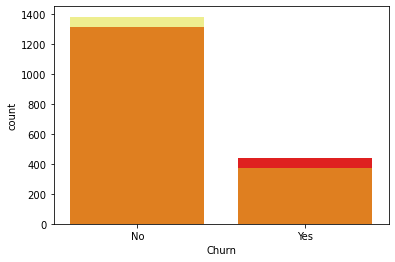

In [50]:
sns.countplot(x=y_test,alpha=1.0,color='red')
sns.countplot(x=y_test_pred,alpha=0.5,color='yellow')
plt.show()

In [51]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classification=KNeighborsClassifier()
KNN_classification.fit(X_train_transformed,y_train)

KNeighborsClassifier()

In [52]:
y_test_pred=KNN_classification.predict(X_test_transformed)


In [53]:
from sklearn import metrics
s=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("KNeighborsClassifier")
Accuracy_score.append(s)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
print(s)

0.7569880205362236


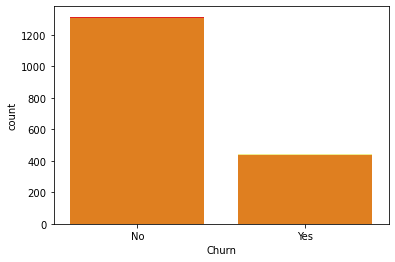

In [54]:
sns.countplot(x=y_test,alpha=1.0,color='red')
sns.countplot(x=y_test_pred,alpha=0.5,color='yellow')
plt.show()

In [55]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train_transformed,y_train)


DecisionTreeClassifier()

In [56]:
y_test_pred = dc.predict(X_test_transformed)


In [57]:

from sklearn import metrics
s=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("DecisionTreeClassifier")
Accuracy_score.append(s)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))

In [58]:
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
print(s)

0.7364517969195664


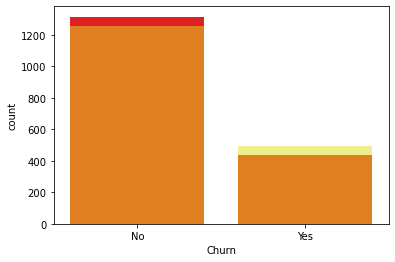

In [59]:
sns.countplot(x=y_test,alpha=1.0,color='red')
sns.countplot(x=y_test_pred,alpha=0.5,color='yellow')
plt.show()

In [60]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train_transformed,y_train)


SVC()

In [61]:
y_test_pred = sv.predict(X_test_transformed)
s=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("Support Vector classification")
Accuracy_score.append(s)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
print(s)


0.8220193953223046


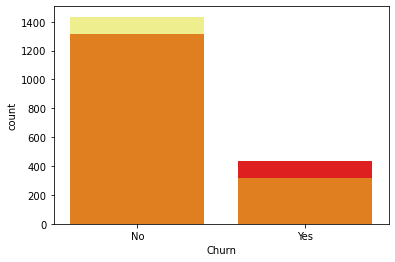

In [62]:
sns.countplot(x=y_test,alpha=1.0,color='red')
sns.countplot(x=y_test_pred,alpha=0.5,color='yellow')
plt.show()

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_transformed,y_train)


RandomForestClassifier()

In [64]:
y_test_pred = rfc.predict(X_test_transformed)
s=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("RandomForestClassifier")
Accuracy_score.append(s)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
print(s)

0.7883628066172276


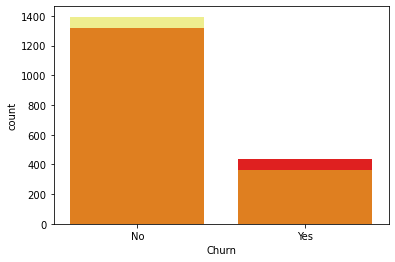

In [65]:
sns.countplot(x=y_test,alpha=1.0,color='red')
sns.countplot(x=y_test_pred,alpha=0.5,color='yellow')
plt.show()

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train_transformed,y_train)

GradientBoostingClassifier()

In [67]:
y_test_pred = gb.predict(X_test_transformed)

In [68]:
s=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("GradientBoostingClassifier")
Accuracy_score.append(s)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
print(s)


0.8128921848260126


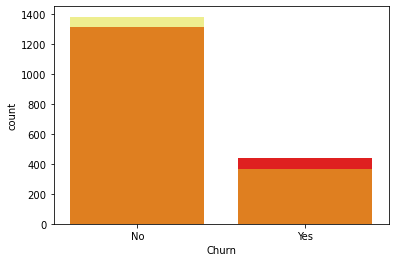

In [69]:
sns.countplot(x=y_test,alpha=1.0,color='red')
sns.countplot(x=y_test_pred,alpha=0.5,color='yellow')
plt.show()

In [70]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_train_transformed,y_train)

AdaBoostClassifier()

In [71]:
y_test_pred = ab.predict(X_test_transformed)

In [72]:
s=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("AdaBoostClassifier")
Accuracy_score.append(s)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
# Confusion_matrix.append(metrics.confusion_matrix(y_test,y_test_pred,))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
print(s)

0.8157444381061039


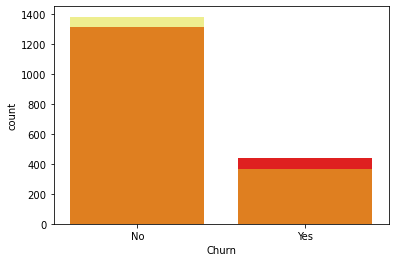

In [73]:
sns.countplot(x=y_test,alpha=1.0,color='red')
sns.countplot(x=y_test_pred,alpha=0.5,color='yellow')
plt.show()

In [74]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train_transformed,y_train)

BernoulliNB()

In [75]:
y_test_pred = nb.predict(X_test_transformed)

In [76]:
s=metrics.accuracy_score(y_test,y_test_pred)
Algorithm.append("Naive bayes Algorithem")
Accuracy_score.append(s)
Precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))
F1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
print(s)

0.7164860239589276


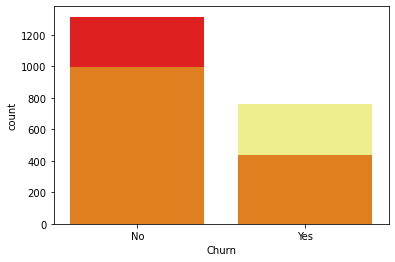

In [77]:
sns.countplot(x=y_test,alpha=1.0,color='red')
sns.countplot(x=y_test_pred,alpha=0.5,color='yellow')
plt.show()